In [57]:
library(keras)
mnist <- dataset_mnist()

x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

print(str(x_train))
print(str(y_train))
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
NULL
 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
NULL


In [30]:
FLAGS <- flags(
  flag_numeric("dropout1", 0.4),
  flag_numeric("dropout2", 0.3)
)

model <- keras_model_sequential()
model %>%
  layer_dense(units = 128, activation = 'relu', input_shape = c(784)) %>%
  layer_dropout(rate = FLAGS$dropout1) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = FLAGS$dropout2) %>%
  layer_dense(units = 10, activation = 'softmax')


model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

`geom_smooth()` using formula 'y ~ x'


loss  accuracy 
0,1017989 0,9795000

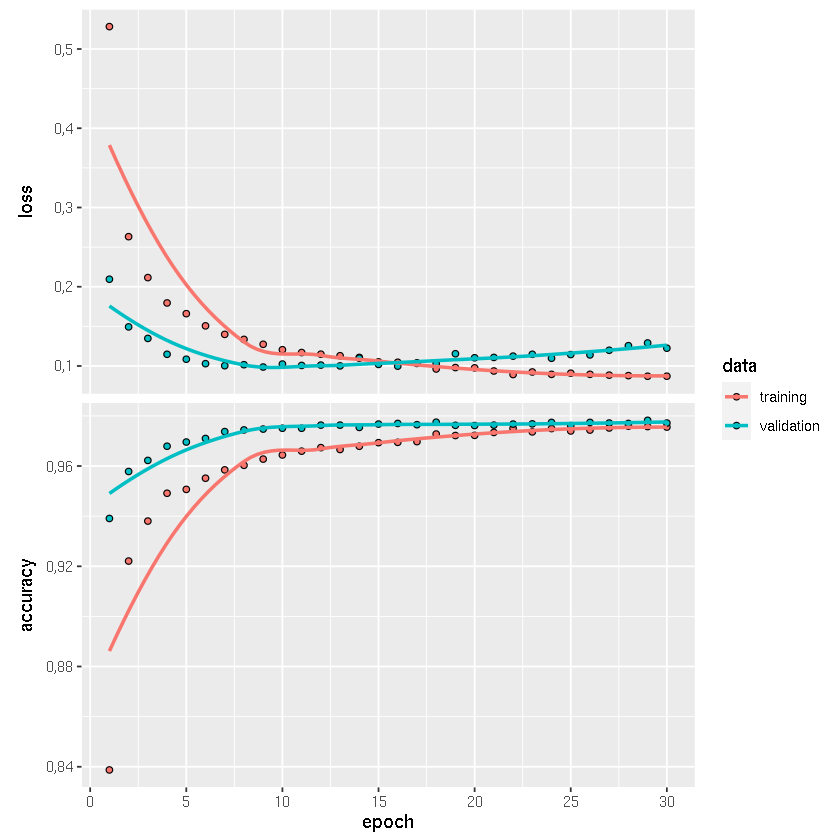

In [31]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)
plot(history)
model %>% evaluate(x_test, y_test)


In [35]:
myParams <- flags(
    flag_numeric("dropout1", 0.4),
    flag_numeric("dropout2", 0.3),
    flag_numeric("unit1", 256),
    flag_numeric("unit2", 128),
    flag_numeric("unit3", 10)
)

myModel <- build_model(myParams)


`geom_smooth()` using formula 'y ~ x'


loss  accuracy 
0,1115586 0,9824000

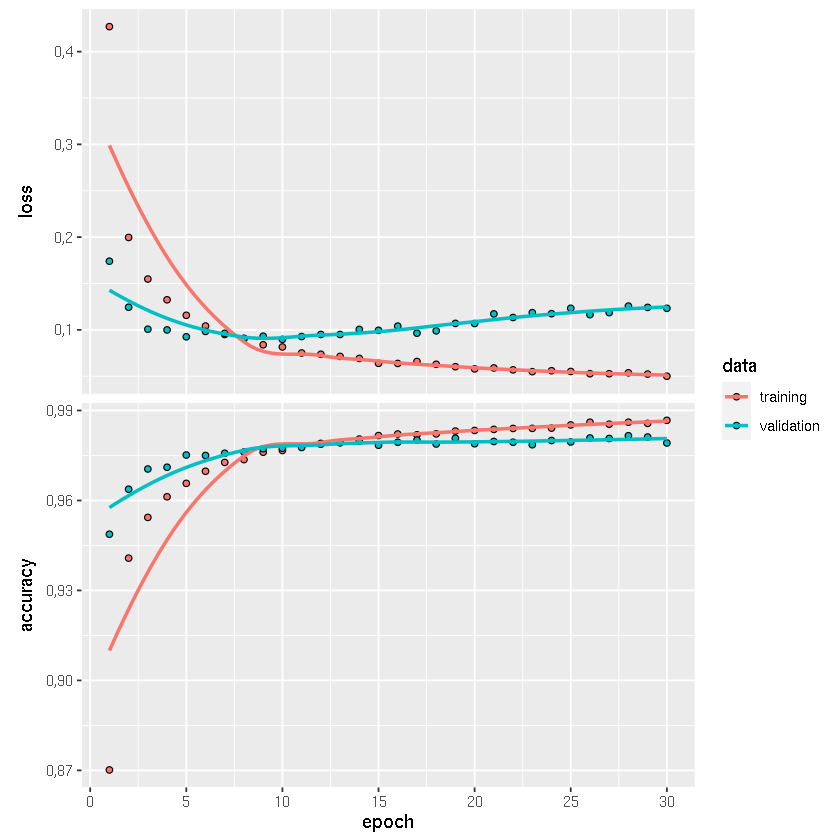

In [36]:
history <- myModel %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)
plot(history)
myModel %>% evaluate(x_test, y_test)


In [38]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)


         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
    [1,]    0    0    0    0    0    0    0    1    0     0
    [2,]    0    0    1    0    0    0    0    0    0     0
    [3,]    0    1    0    0    0    0    0    0    0     0
    [4,]    1    0    0    0    0    0    0    0    0     0
    [5,]    0    0    0    0    1    0    0    0    0     0
    [6,]    0    1    0    0    0    0    0    0    0     0
    [7,]    0    0    0    0    1    0    0    0    0     0
    [8,]    0    0    0    0    0    0    0    0    0     1
    [9,]    0    0    0    0    0    1    0    0    0     0
   [10,]    0    0    0    0    0    0    0    0    0     1
   [11,]    1    0    0    0    0    0    0    0    0     0
   [12,]    0    0    0    0    0    0    1    0    0     0
   [13,]    0    0    0    0    0    0    0    0    0     1
   [14,]    1    0    0    0    0    0    0    0    0     0
   [15,]    0    1    0    0    0    0    0    0    0     0
   [16,]    0    0    0    0    0    1  

In [41]:
print(length(x_train))

[1] 47040000


## idea generale

Il data set viene diviso inizialmente in 2 parti:

    - train: 80%
    - test: 20%
    
Il dataset di train viene poi usato nel tuning facendo una cross validation, ovvero viene diviso in n parti uguali e a turno trainato con certi parametri su n-1 set di dati e l'ultimo viene usato come validation set

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [,58] [,59] [,60] [,

`geom_smooth()` using formula 'y ~ x'


List of 2
 $ params :List of 3
  ..$ verbose: int 1
  ..$ epochs : int 30
  ..$ steps  : int 50
 $ metrics:List of 4
  ..$ loss        : num [1:30] 0,908 0,434 0,317 0,267 0,223 ...
  ..$ accuracy    : num [1:30] 0,726 0,875 0,907 0,920 0,937 ...
  ..$ val_loss    : num [1:30] 0,431 0,317 0,279 0,251 0,238 ...
  ..$ val_accuracy: num [1:30] 0,876 0,906 0,917 0,921 0,924 ...
 - attr(*, "class")= chr "keras_training_history"


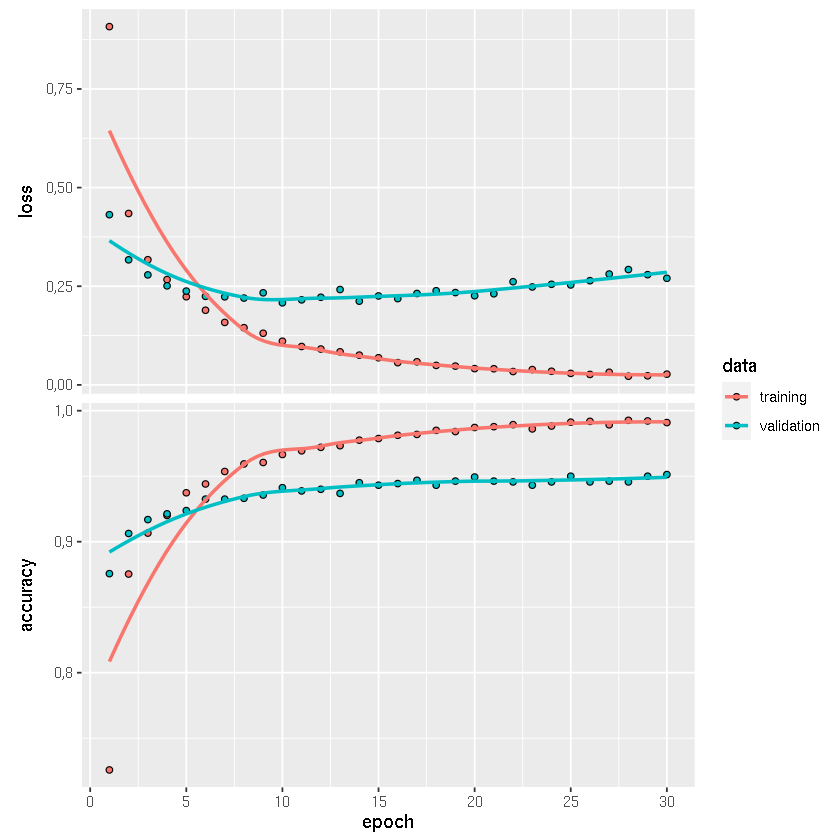

In [91]:

myModel <- build_model(myParams)
history <- myModel %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)
plot(history)
stats <- myModel %>% evaluate(x_test, y_test)
str(history)


In [95]:
str(stats)
print(stats[[2]])

 Named num [1:2] 0,175 0,967
 - attr(*, "names")= chr [1:2] "loss" "accuracy"
[1] 0,967


In [179]:
a <- seq(1,10,1)
print(a[length(a)/5*2:length(a)/5*3])
print(a)
l=as.integer(length(a)/5)

for (i in 0:(length(a)/l-1)){
    print(a[-(i*l+1):-(l*(i+1))])
}

[1]  2  3  4  6  7  8  9 10 NA
 [1]  1  2  3  4  5  6  7  8  9 10
[1]  3  4  5  6  7  8  9 10
[1]  1  2  5  6  7  8  9 10
[1]  1  2  3  4  7  8  9 10
[1]  1  2  3  4  5  6  9 10
[1] 1 2 3 4 5 6 7 8


In [176]:
build_model <- function(params){
    model <- keras_model_sequential()
    model %>%
      layer_dense(units = params$unit1, activation = 'relu', input_shape = c(784)) %>%
      layer_dropout(rate = params$dropout1) %>%
      layer_dense(units = params$unit2, activation = 'relu') %>%
      layer_dropout(rate = params$dropout2) %>%
      layer_dense(units = params$unit3, activation = 'softmax')

    model %>% compile(
      loss = 'categorical_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
    )
    return(model)
}


cv_tune_builder <- function (builder, params, x, y, cv=4){
    l=as.integer(nrow(x)/cv)
    accs <- NULL
    for(i in 0:(cv-1)){
        x_tr <- x[-(i*l+1):-(l*(i+1)),]; x_cv <- x[(i*l+1):(l*(i+1)),]; 
        y_tr <- y[-(i*l+1):-(l*(i+1)),]; y_cv <- y[(i*l+1):(l*(i+1)),];
        model <- builder(params)
        hist  <- model %>% fit (x_tr, y_tr,  epochs = 30, batch_size = 128)
        stats <- model %>% evaluate(x_cv, y_cv)
        accs <- c(accs, stats[[2]])
    }
    return (accs)
}


tune_builder <- function(builder, par_default, par_list, x, y, cv=4, verbose=FALSE){
    grid = expand.grid(par_list)
    mean_accs <- NULL
    best_acc <- 0.0
    par_best <- rlang::duplicate(par_default, shallow=FALSE)
    for(i in 1:nrow(grid)){
        par_copy <- rlang::duplicate(par_default, shallow=FALSE)
        for (name in names(par_list)){
            par_copy[[name]] <- grid[[name]][i]
        }
        acc <- cv_tune_builder(builder, par_copy, x, y, cv)
        mean_accs <- c(mean_accs, mean(acc))
        if(verbose){
            print("Parameters: ")
            print(par_copy)
            print("Accuracies:")
            print(acc)
            print(paste("Mean: ", mean(acc)))
        }
        if (mean(acc)>best_acc){
            print("Change")
            best_acc <- mean(acc)
            par_best <- rlang::duplicate(par_copy, shallow=FALSE)
        }        
    }
    if(verbose){
        print("Best Parameters: ")
        print(par_best)
        print(paste("Accuracy:", best_acc))
    }
    grid$Mean_acc <- mean_accs
    #return(par_best)
    return (grid)
}

In [177]:
x_train <- mnist$train$x[1:8000,1:28 ,1:28 ]
y_train <- mnist$train$y[1:8000 ]
x_test  <- mnist$test$x[8001:10000,1:28 ,1:28]
y_test  <- mnist$test$y[8001:10000]
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

In [178]:
myParams <- flags(
    flag_numeric("dropout1", 0.4),
    flag_numeric("dropout2", 0.3),
    flag_numeric("unit1", 256),
    flag_numeric("unit2", 128),
    flag_numeric("unit3", 10)
)

myList <- list(dropout1= c(0.3, 0.2), 
               unit2=c (128, 64) )
#myList <- list(dropout1= c(0.3), 
#               unit2=c (128) )

tuned_grid <- tune_builder(build_model, myParams, myList, x_train, y_train, 4, TRUE )

print(tuned_grid)

[1] "Parameters: "
     name    type value description
 dropout1 numeric   0,3          NA
 dropout2 numeric   0,3          NA
    unit1 numeric   256          NA
    unit2 numeric   128          NA
    unit3 numeric    10          NA
[1] "Accuracies:"
[1] 0,9510 0,9640 0,9560 0,9465
[1] "Mean:  0,954374983906746"
[1] "Change"
[1] "Parameters: "
     name    type value description
 dropout1 numeric   0,2          NA
 dropout2 numeric   0,3          NA
    unit1 numeric   256          NA
    unit2 numeric   128          NA
    unit3 numeric    10          NA
[1] "Accuracies:"
[1] 0,9520 0,9640 0,9555 0,9560
[1] "Mean:  0,956874996423721"
[1] "Change"
[1] "Parameters: "
     name    type value description
 dropout1 numeric   0,3          NA
 dropout2 numeric   0,3          NA
    unit1 numeric   256          NA
    unit2 numeric    64          NA
    unit3 numeric    10          NA
[1] "Accuracies:"
[1] 0,9485 0,9615 0,9575 0,9450
[1] "Mean:  0,953124985098839"
[1] "Parameters: "
     na

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [112]:
x_train <- mnist$train$x[1:8000,1:28 ,1:28 ]
y_train <- mnist$train$y[1:8000 ]
x_test  <- mnist$test$x[8001:10000,1:28 ,1:28]
y_test  <- mnist$test$y[8001:10000]
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

print(cv_tune_builder(build_model, myParams, x_train, y_train))

[1] 8000
[1] 1
[1] 2000
[1] 8000
[1] 2001
[1] 4000
[1] 8000
[1] 4001
[1] 6000
[1] 8000
[1] 6001
[1] 8000
[1] 0,9520 0,9615 0,9620 0,9495


In [180]:
a <- list(drop= c(1,2,3), u=c('a', 'b', 'c'), f=c(6,7,8))
print(a)
ns<-names(a)
for (n in ns){
    print(a[[n]][1])
}

'drop' %in% names(a)

$drop
[1] 1 2 3

$u
[1] "a" "b" "c"

$f
[1] 6 7 8

[1] 1
[1] "a"
[1] 6


[1] TRUE

In [142]:
gr <- expand.grid( a)
print(gr)

   drop u f
1     1 a 6
2     2 a 6
3     3 a 6
4     1 b 6
5     2 b 6
6     3 b 6
7     1 c 6
8     2 c 6
9     3 c 6
10    1 a 7
11    2 a 7
12    3 a 7
13    1 b 7
14    2 b 7
15    3 b 7
16    1 c 7
17    2 c 7
18    3 c 7
19    1 a 8
20    2 a 8
21    3 a 8
22    1 b 8
23    2 b 8
24    3 b 8
25    1 c 8
26    2 c 8
27    3 c 8
